# SMAI Assignment 1

- Name - Arnav Negi
- Roll - 2021101112

This assignment will use the K nearest neighbours algorithm to classify embeddings of drawings of items.

# 2 - K Nearest Neighbours

## 2.1 The data

We use `numpy` and `pandas` to read the data and convert it into a dataframe.

In [46]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

In [47]:
# reading data
dataset = np.load('data.npy', allow_pickle=True, )
df = pd.DataFrame(dataset)

# set dataframe columns
df.columns = ['game_id', 'resnet', 'vit', 'word', 'guess_time']

# We only need the embeddings and the word
df = df[['resnet', 'vit', 'word']]
dataset = df.to_numpy() # np.array version for use in classifier
df.head()

,resnet,vit,word
0,"[[-0.001002429, 0.047839083, -0.0046581626, 0....","[[0.31094703, 0.20213455, -0.16519593, -0.0530...",sleep
1,"[[-0.013190677, 0.08283211, 0.006474074, 0.001...","[[-0.07832227, -0.07557866, -0.05214904, -0.32...",oven
2,"[[-0.010499587, 0.047467805, -0.019303396, -0....","[[0.31455985, -0.024428558, 0.33139282, 0.2197...",chair
3,"[[-0.023966337, 0.024375185, -0.0009961016, -0...","[[0.113364324, -0.23683439, 0.34781978, -0.427...",igloo
4,"[[-0.018555297, 0.050565578, -0.008821793, 0.0...","[[0.22332864, -0.28626534, -0.037617087, -0.17...",fish


## 2.2 Task 1 - Data exploration

Using `matplotlib` to plot the distribution of the labels.

<Axes: xlabel='count', ylabel='word'>

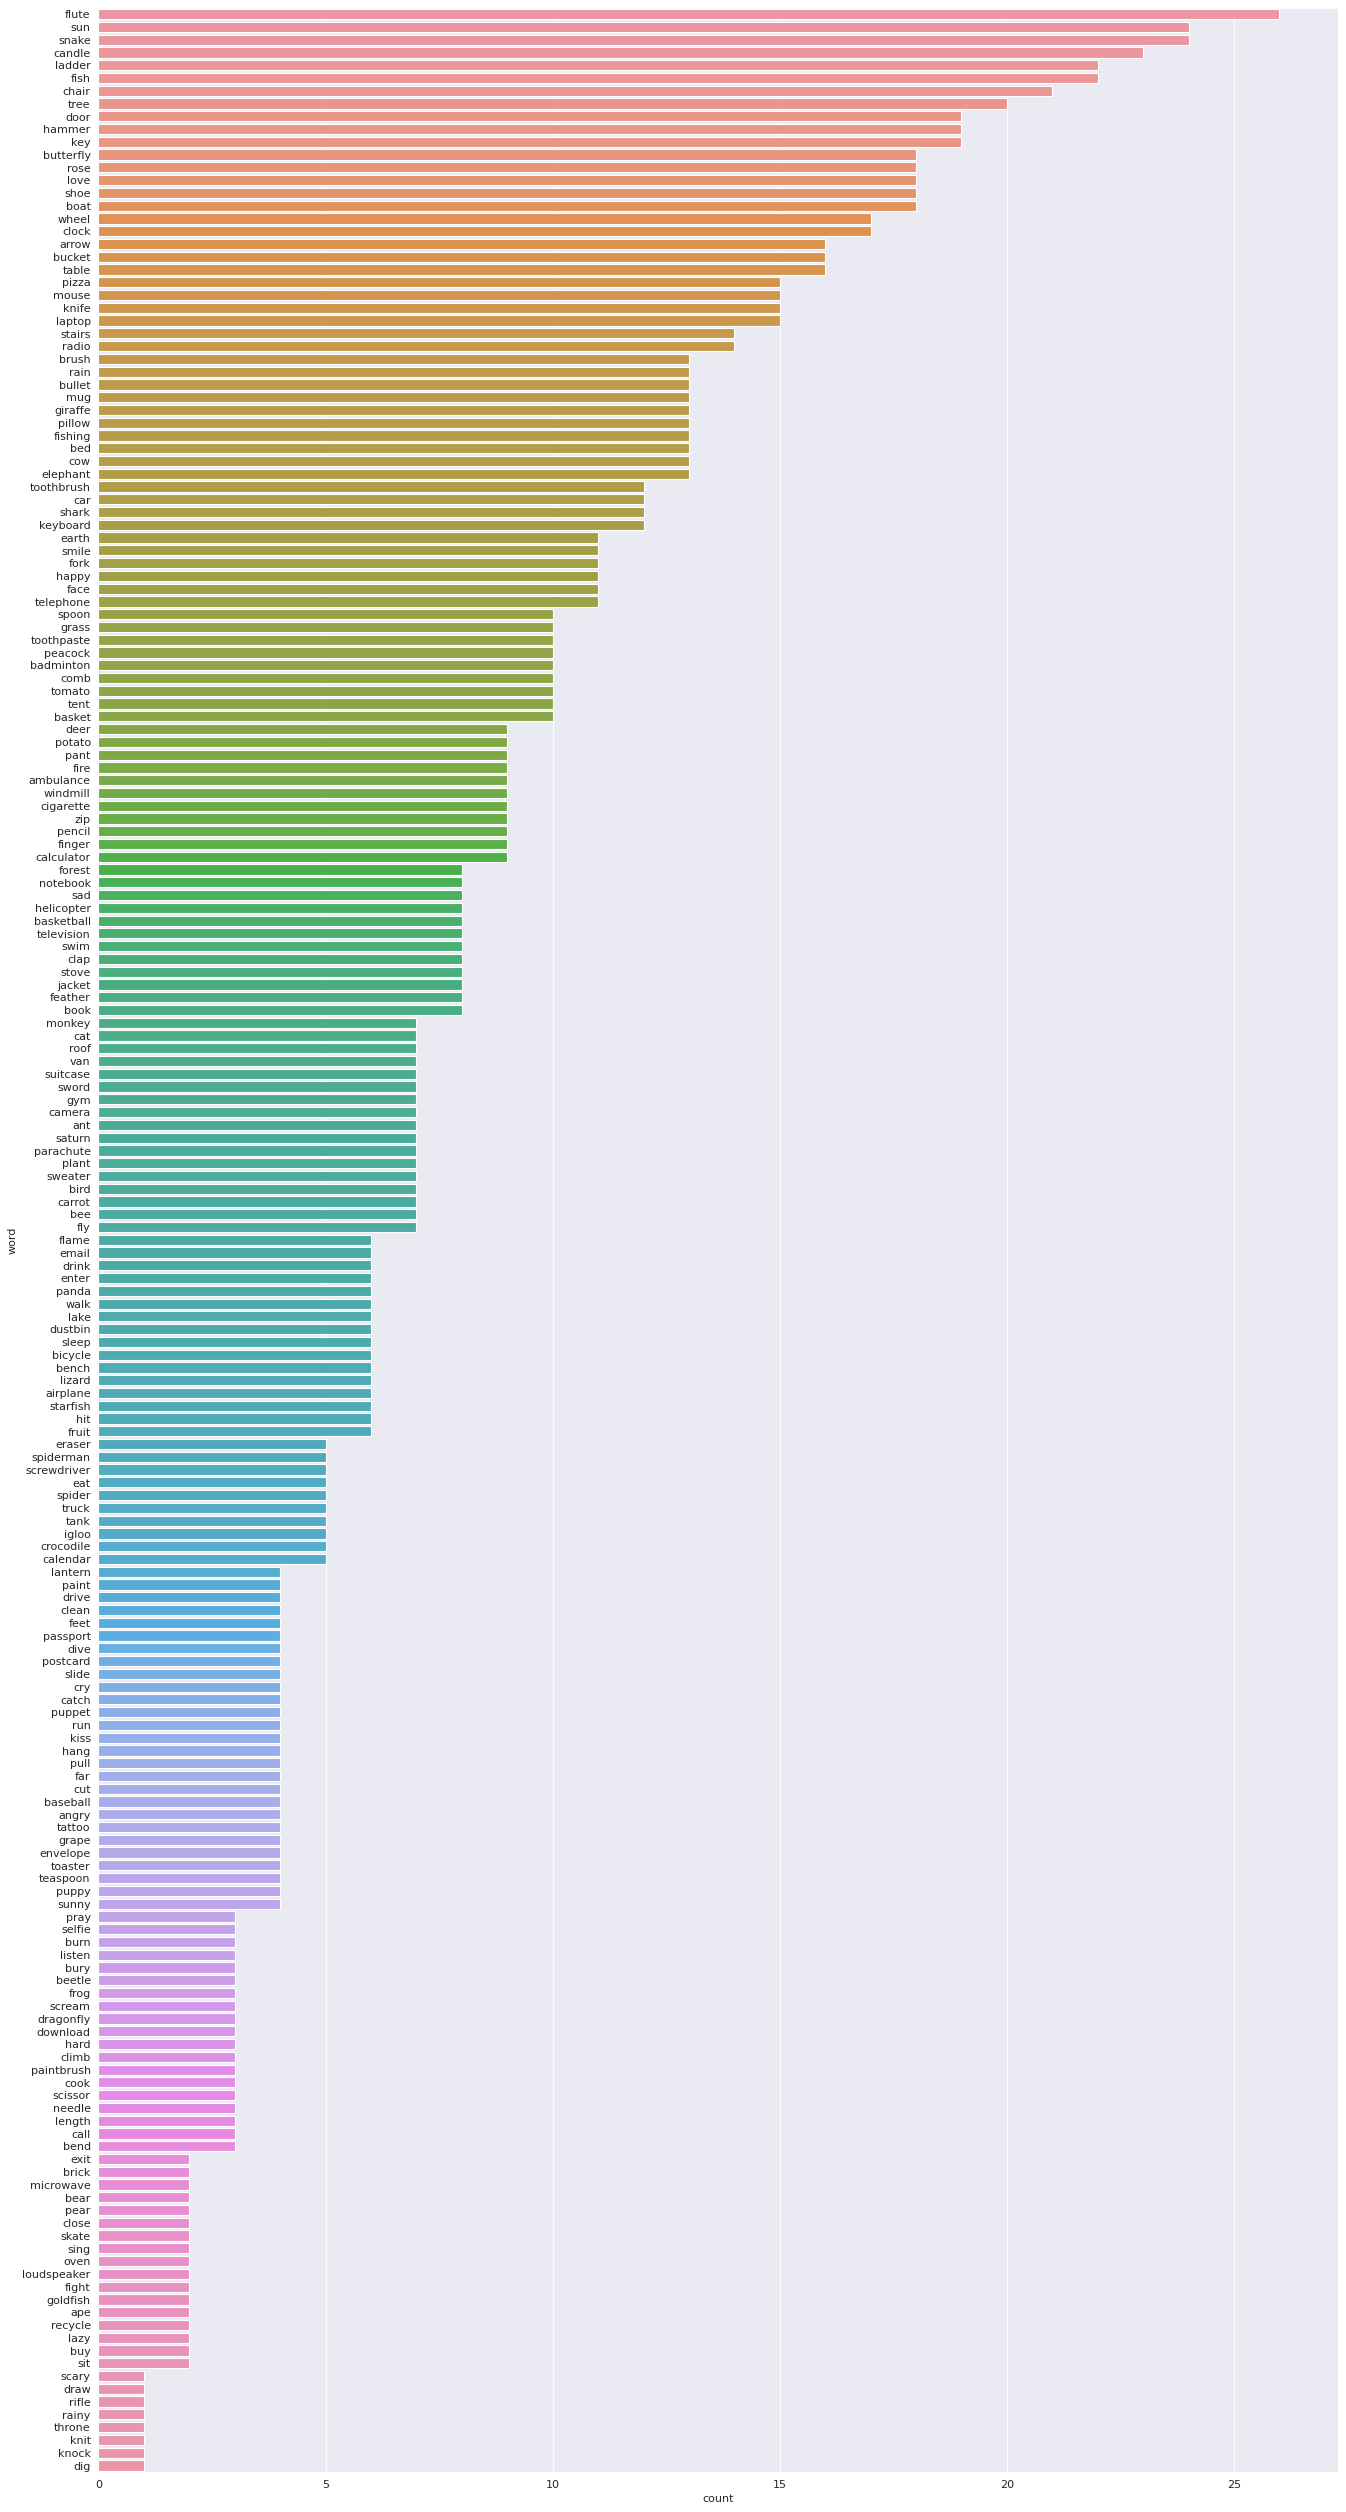

In [48]:
plt.figure(num=None, figsize=(20,40), dpi=80, facecolor='w', edgecolor='r')
sns.countplot(y='word', data=df, order=df['word'].value_counts().index)

## 2.3 Task 2 - KNN Implementation

We define a KNN class here which uses different distance metrics, values of k and one of the two given embeddings to classify the data.

In [49]:
from classes import KNeighborsClassifierNaive, KNeighborsClassifierOptimized # import our classes

In [50]:
X, y = dataset[:, :-1], dataset[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
knn = KNeighborsClassifierOptimized(k = 13, encoder_type='vit') # Using optimized version for quicker results
knn.fit(X_train, y_train)

In [51]:
f1, acc, precision, recall = knn.score(knn.predict(X_test), y_test)
print('Test')
print(f'F1 score: {f1}, Accuracy: {acc}, Precision: {precision}, Recall: {recall}')

Test
F1 score: 0.14772301300963722, Accuracy: 0.25666666666666665, Precision: 0.15735057582191342, Recall: 0.1781013042159539


## 2.4 Task 3 - Hyperparameter tuning

We try different parameters to try to maximize the accuracy.

In [52]:
possible_k = [1, 3, 9, 11, 13]
possible_encoders = ['resnet', 'vit']
possible_metrics = ['euclidean', 'manhattan', 'cosine']

results = []
for k in possible_k:
    for encoder in possible_encoders:
        for metric in possible_metrics:
            knn.set_parameters(k, encoder, metric)
            results.append((knn.score(knn.predict(X_test), y_test)[1], (k, encoder, metric)))
            
results.sort(key=lambda x: x[0], reverse=True)
results = results[:20]

In [53]:
for i in range(20):
    print(f'Rank: {i+1}, Accuracy: {results[i][0]}, Parameters: {results[i][1]}')

Rank: 1, Accuracy: 0.2966666666666667, Parameters: (13, 'vit', 'manhattan')
Rank: 2, Accuracy: 0.28, Parameters: (3, 'vit', 'manhattan')
Rank: 3, Accuracy: 0.28, Parameters: (11, 'vit', 'manhattan')
Rank: 4, Accuracy: 0.27666666666666667, Parameters: (1, 'vit', 'manhattan')
Rank: 5, Accuracy: 0.2733333333333333, Parameters: (9, 'vit', 'manhattan')
Rank: 6, Accuracy: 0.27, Parameters: (1, 'vit', 'euclidean')
Rank: 7, Accuracy: 0.27, Parameters: (3, 'vit', 'euclidean')
Rank: 8, Accuracy: 0.2633333333333333, Parameters: (11, 'vit', 'euclidean')
Rank: 9, Accuracy: 0.26, Parameters: (1, 'vit', 'cosine')
Rank: 10, Accuracy: 0.25666666666666665, Parameters: (9, 'vit', 'euclidean')
Rank: 11, Accuracy: 0.25666666666666665, Parameters: (9, 'vit', 'cosine')
Rank: 12, Accuracy: 0.25666666666666665, Parameters: (11, 'vit', 'cosine')
Rank: 13, Accuracy: 0.25666666666666665, Parameters: (13, 'vit', 'euclidean')
Rank: 14, Accuracy: 0.25333333333333335, Parameters: (3, 'vit', 'cosine')
Rank: 15, Accura

We plot the k vs accuracy graph with encoder as 'vit' and distance as 'euclidean'.

In [54]:
plot_results = []
for k in range(1,20):
    knn.set_parameters(k, 'vit', 'manhattan')
    plot_results.append(knn.score(knn.predict(X_test), y_test)[1]*100)

Text(0.5, 1.0, 'k vs accuracy')

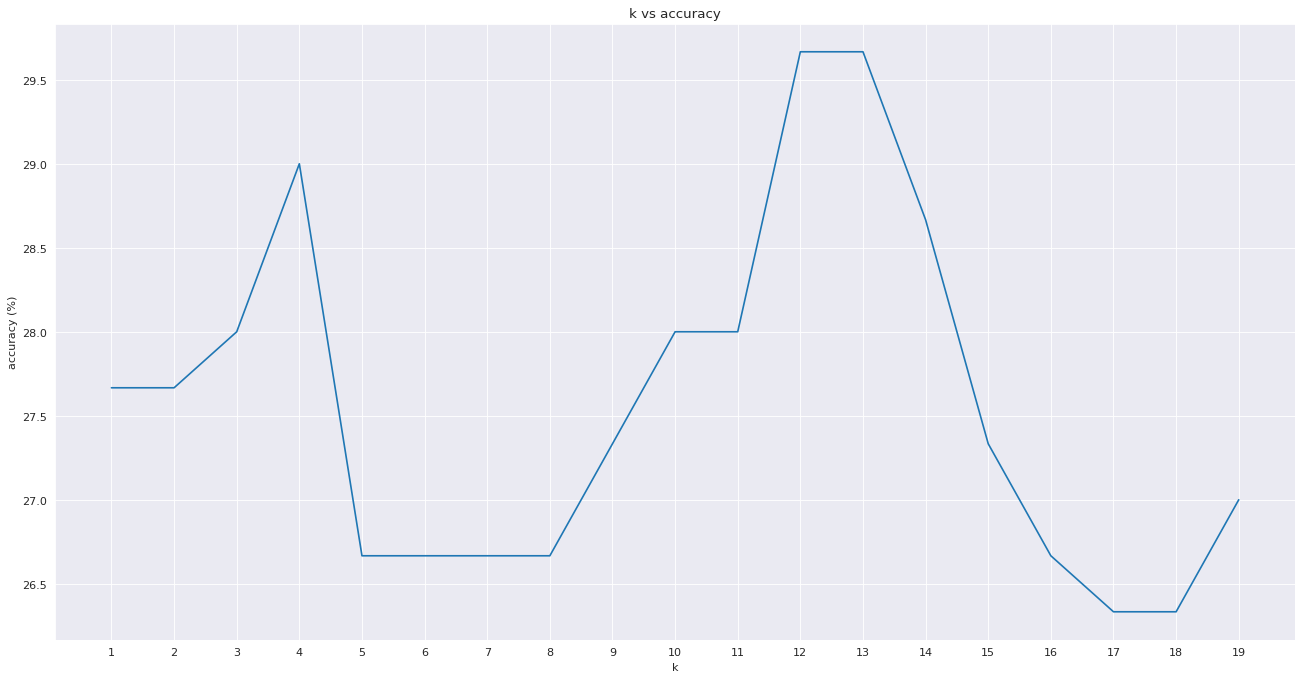

In [55]:
# seaborn plot for k vs accuracy
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='r')
sns.lineplot(x=range(1,20), y=plot_results)
plt.xticks(range(1,20))
plt.xlabel('k')
plt.ylabel('accuracy (%)')
plt.title('k vs accuracy')

## 2.5 Task 4 - Testing

To test the models, use the `eval.sh` script.

## 2.6 Task 5 - Optimization

Using vectorization we can speed up the algorithm significantly. 



In [56]:
from sklearn.neighbors import KNeighborsClassifier # Use sklearn's KNN classifier for comparison
import time # time module for benchmarking

In [57]:
knn_initial = KNeighborsClassifierNaive(k = 13, encoder_type='vit', metric='manhattan')
knn_optimized = KNeighborsClassifierOptimized(k = 13, encoder_type='vit', metric='manhattan')
knn_sklearn = KNeighborsClassifier(n_neighbors=13, metric='manhattan')

In [58]:
# Need to change dataset to numpy array for sklearn
X_train_sklearn = np.array([np.array(x[0]) for x in X_train[:, 1]])
X_test_sklearn = np.array([np.array(x[0]) for x in X_test[:, 1]])

We benchmark the 3 models, (the 'optimized' and 'initial' models are also 'best') in log scale for better visualization.

In [59]:
# function for benchmarking
def get_function_time(func, *args):
    t1 = time.time()
    func(*args)
    t2 = time.time()
    return t2 - t1

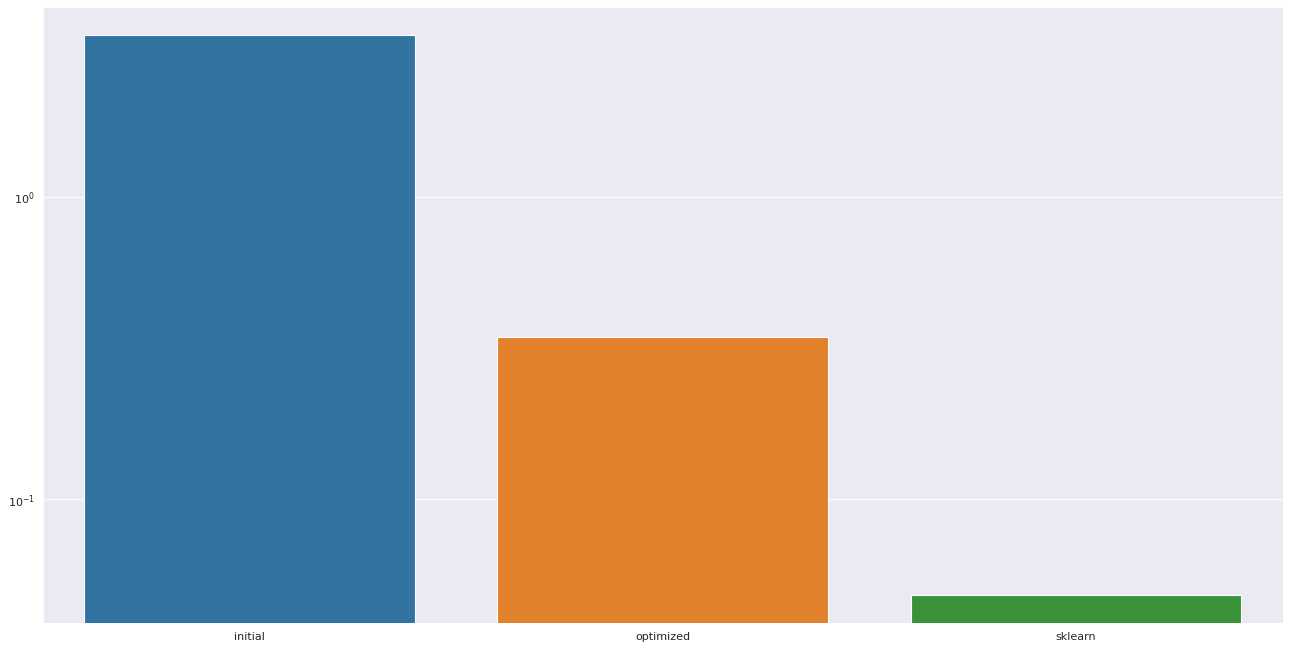

In [60]:
# train the models
knn_initial.fit(X_train, y_train)
knn_optimized.fit(X_train, y_train)
knn_sklearn.fit(X_train_sklearn, y_train)

t_initial = get_function_time(knn_initial.predict, X_test)
t_optimized = get_function_time(knn_optimized.predict, X_test)
t_sklearn = get_function_time(knn_sklearn.predict, X_test_sklearn)

# plotting the 3 times as bar plot
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x=['initial', 'optimized', 'sklearn'], y=[t_initial, t_optimized, t_sklearn]).set_yscale("log")

Now we benchmark each model - sklearn, naive and optimized. We find the inference time for 20% of the dataset (300 samples), while training on different sizes.

In [61]:
inference_times = []

for sz in [0.1 * i for i in range(1, 10)]:
    iX_train, _, iy_train, _ = train_test_split(X, y, test_size=(1-sz), shuffle=True, random_state=42)
    knn_initial.fit(iX_train, iy_train)
    knn_optimized.fit(iX_train, iy_train)
    # Need to change dataset to numpy array for sklearn
    knn_sklearn.fit(np.array([np.array(x[0]) for x in iX_train[:, 1]]), iy_train)
    
    # calculate inference time
    t_initial = get_function_time(knn_initial.predict, X_test)
    t_optimized = get_function_time(knn_optimized.predict, X_test)
    t_sklearn = get_function_time(knn_sklearn.predict, X_test_sklearn)
    
    inference_times.append([sz * X.shape[0], t_initial, t_optimized, t_sklearn])

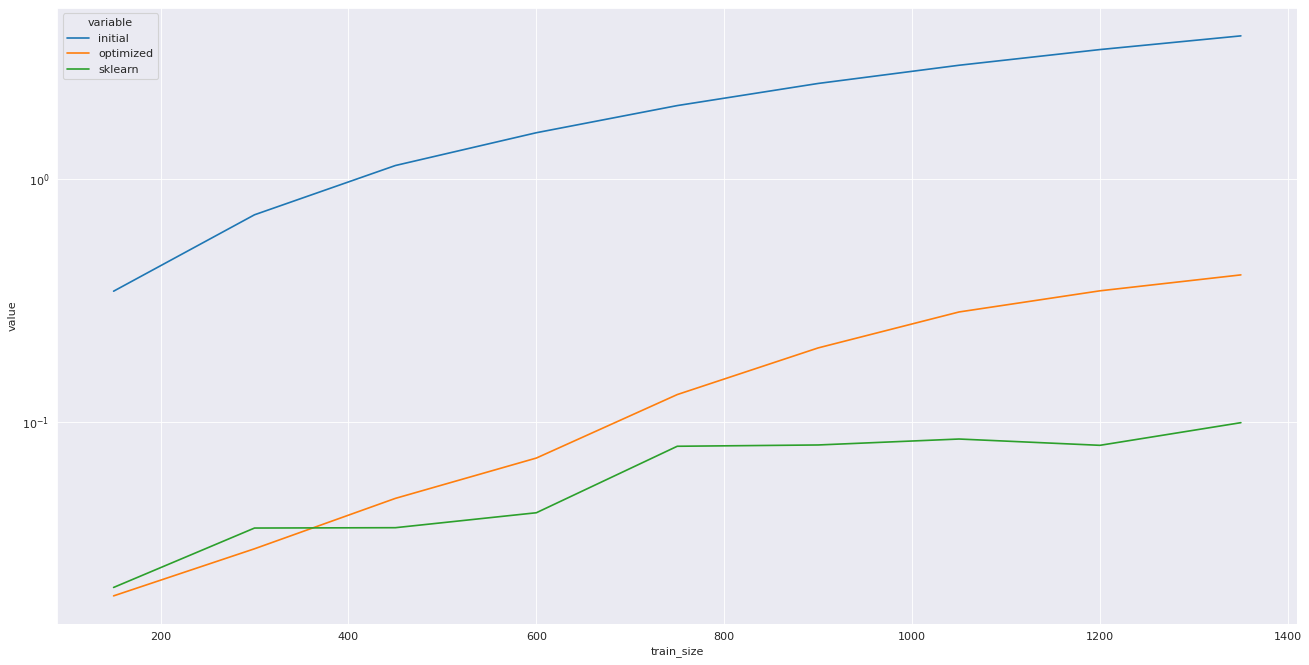

In [62]:
# Plotting line graph for the inference times
# Convert to dataframe first
inference_df = pd.DataFrame(inference_times, columns=['train_size', 'initial', 'optimized', 'sklearn'])

plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='r')
sns.lineplot(x='train_size', y='value', hue='variable', data=pd.melt(inference_df, ['train_size'])).set_yscale("log") # Plot with log scale

# 3 - Decision Trees

In this part we use decision trees to classify the data.

## 3.1 Task 1 - Data exploration

The data given is a multilabel dataset `advertisements.csv`. It has 1000 rows and 11 features. We use pandas and seaborn to visualize the data.

In [63]:
advertisements_df = pd.read_csv('advertisement.csv')
advertisements_df.head()

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,electronics clothing sports
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,clothing electronics food sports
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,food
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,home


We can explore the data by plotting the distribution of various columns.

In [64]:
labels = []
for i in range(1000):
    labels.extend(advertisements_df['labels'][i].split(' '))
labels_unique = list(set(labels))

<Axes: ylabel='Count'>

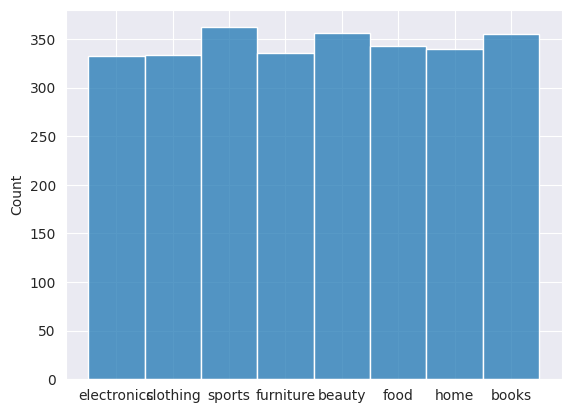

In [65]:
sns.histplot(labels)

<Axes: xlabel='age', ylabel='Count'>

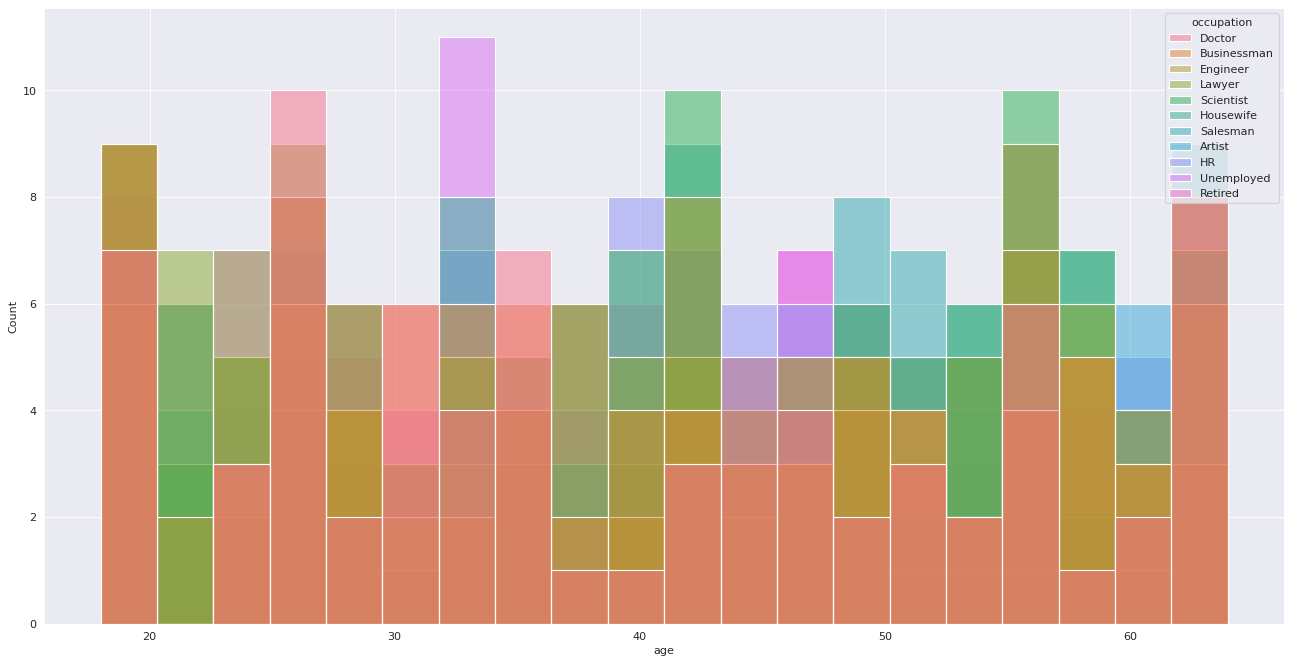

In [66]:
# Plotting distribution of age
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='r')
sns.histplot(advertisements_df, x='age', bins=20, hue='occupation')

<Axes: xlabel='income', ylabel='Count'>

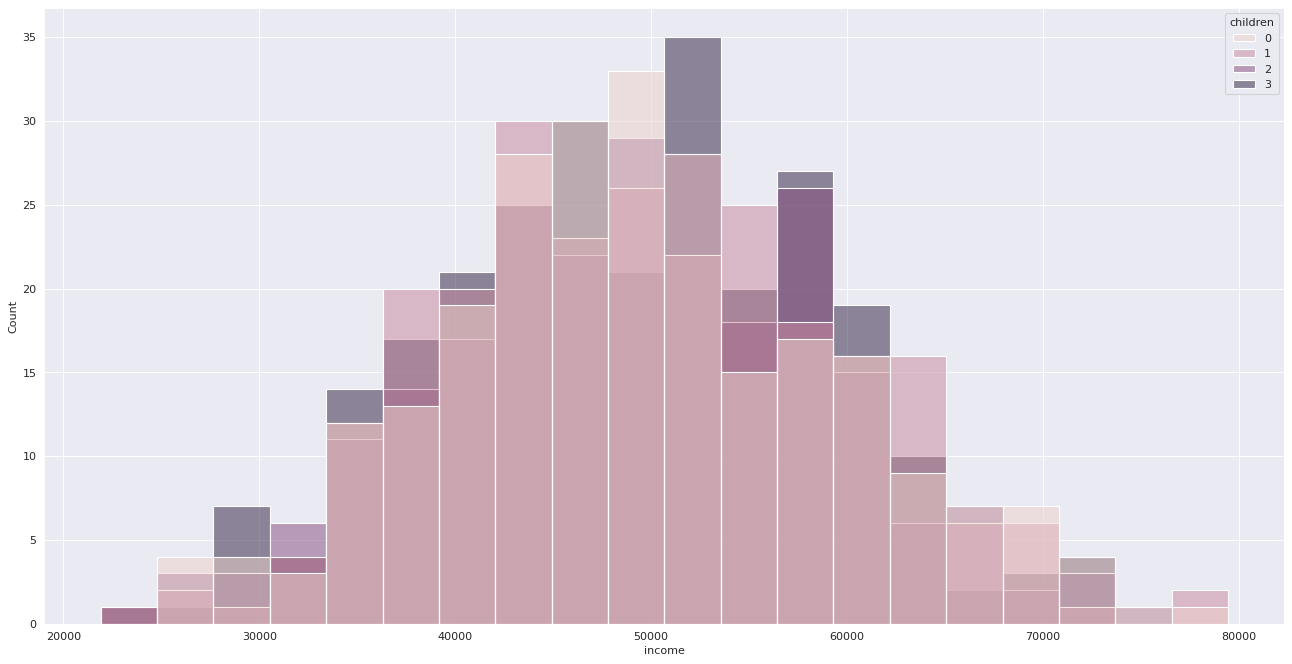

In [67]:
# Plotting plot of income with children hue
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='r')
sns.histplot(advertisements_df, x='income', hue='children', bins=20)

<Axes: xlabel='purchase_amount', ylabel='Count'>

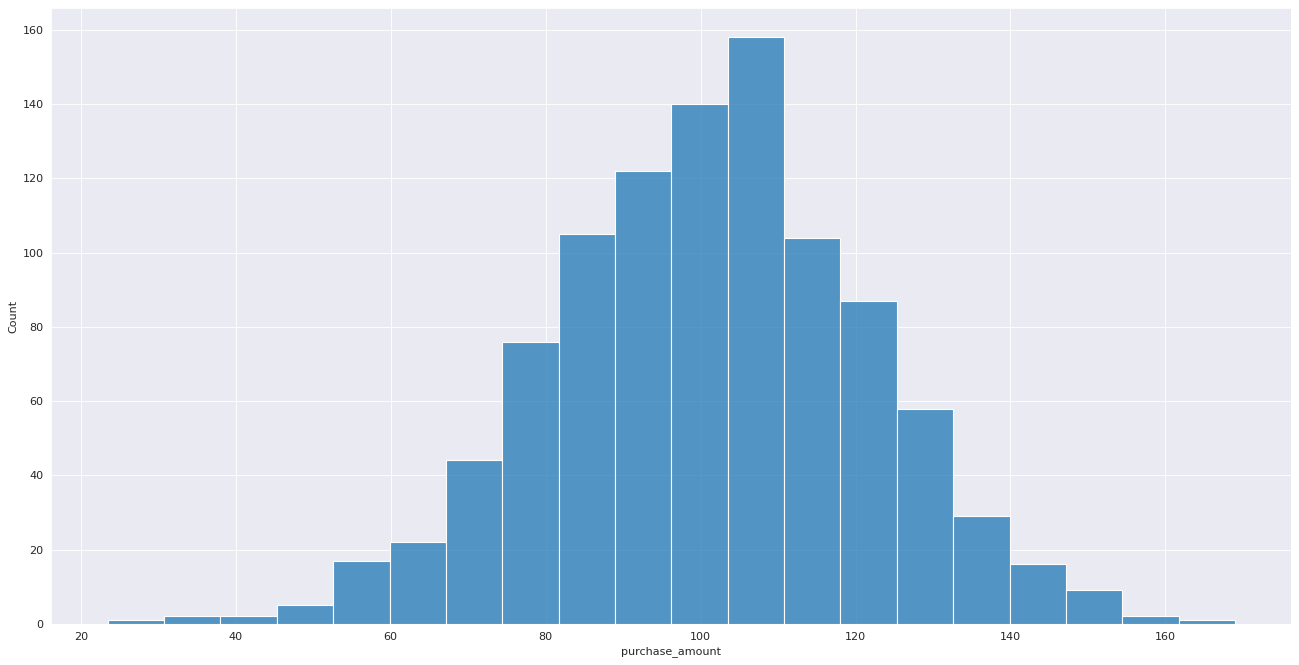

In [68]:
# Plotting purchase amount distribution
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='r')
sns.histplot(advertisements_df['purchase_amount'], bins=20)

As we can see most of the data has been sampled from random distributions such as gaussian and uniform. There seems to be almost no correlation between the columns as can be seen from the following pair plot and correlation matrix.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


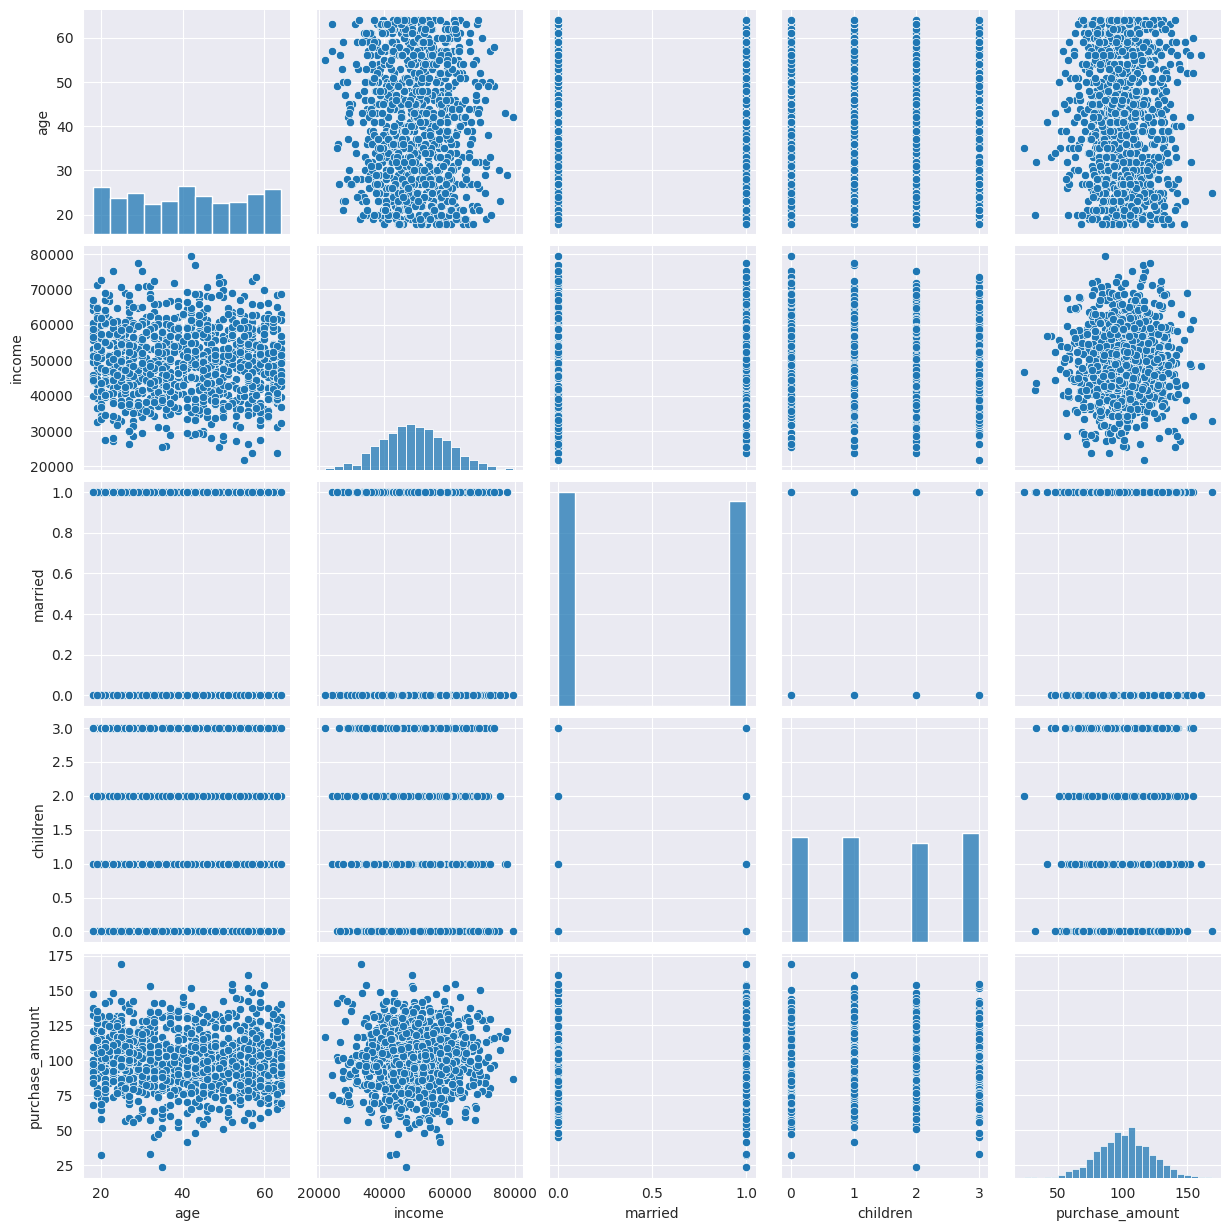

In [69]:
sns.pairplot(advertisements_df)

/tmp/ipykernel_10079/3967092904.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(advertisements_df.corr(), annot=True)


<Axes: >

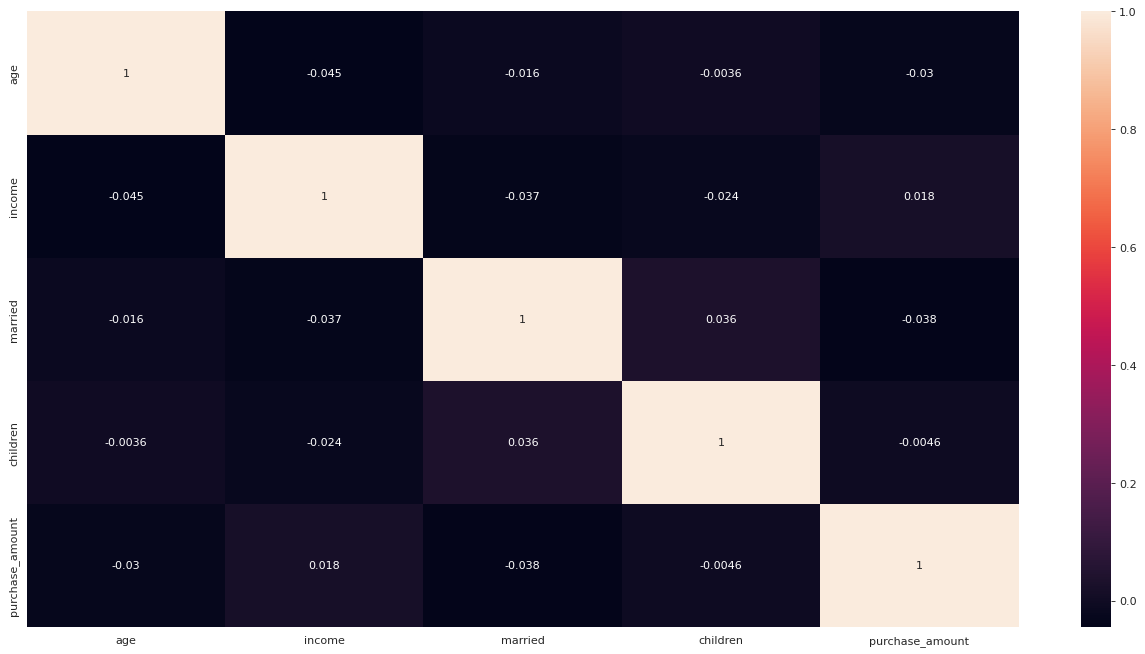

In [70]:
# Plotting correlation matrix
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='r')
sns.heatmap(advertisements_df.corr(), annot=True)

## Data Preprocessing

In this section we preprocess the data to handle missing values and categorical data. We also handle the multilabel column by converting it into a one hot encoded matrix.

In [71]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

There are no missing values to be handled

In [72]:
advertisements_df.isna().sum()
# No missing values

age                 0
gender              0
income              0
education           0
married             0
children            0
city                0
occupation          0
purchase_amount     0
most bought item    0
labels              0
dtype: int64

In [73]:
# Handling the multilabel column
advertisements_df['labels'] = advertisements_df['labels'].apply(lambda x: x.split(' '))
    
advertisements_df.head()

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,"[electronics, clothing, sports]"
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,"[furniture, beauty]"
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,"[clothing, electronics, food, sports]"
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,[food]
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,[home]


We drop the city column as it has almost all unique values. We encode the gender label as binary.

In [74]:
advertisements_df.drop('city', axis=1, inplace=True)

We set up a pipeline to normalize and encode the data.

In [75]:
numerical_features = [
    'age', 'income', 'purchase_amount', 'children'
]
categorical_features = [
    'education', 'occupation', 'most bought item'
]
binary_features = [
    'married', 'gender', 
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('bin', OrdinalEncoder(), binary_features)
    ]
)

In [76]:
X = preprocessor.fit_transform(advertisements_df)

## Data splits

We split the data for to test the performance of our models.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, advertisements_df['labels'], test_size=0.2, shuffle=True, random_state=42)

In [78]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 45), (200, 45), (800,), (200,))

## 3.2 Decision Tree Implementation

We implement two types of classes to handle the multi-label problem. These will be essentially a wrapper for the sklearn decision tree classifier.

In [79]:
from classes import DecisionTreePowerset, DecisionTreeMultiOutput
from sklearn.model_selection import KFold

In [80]:
dt_powerset = DecisionTreePowerset()
dt_multioutput = DecisionTreeMultiOutput()

## 3.3 Hyperparameter tuning

We try different parameters and return the results for each triplet of `criterion`, `max_depth` and `max_features`.

The results are returned are

- F1(micro)
- F1(macro)
- F1(weighted)
- Accuracy
- Hamming Score
- Precision
- Recall
- Confusion Matrix

The confusion matrix is given as a list of lists, where each list is the confusion matrix for each class.

### Powerset formulation

In [81]:
criteria = ['gini', 'entropy']
max_depths = [3, 5, 10, 20, 30]
max_features = [3, 5, 7, 9, 11]

results = []

# Storing results for each triplet of parameters
for criterion in criteria:
    for max_depth in max_depths:
        for max_feature in max_features:
            dt_powerset = DecisionTreePowerset(criterion=criterion, max_depth=max_depth, max_features=max_feature)
            dt_powerset.fit(X_train, y_train)
            r = dt_powerset.score(dt_powerset.predict(X_test), y_test)

            results.append(((criterion, max_depth, max_feature), r))
            
results

[(('gini', 3, 3),
  (0.2601010101010101,
   0.18341702845877364,
   0.1862414301906704,
   0.02,
   0.63375,
   0.3886792452830189,
   0.1954459203036053,
   array([[[  8,   6],
           [124,  62]],
   
          [[134,  56],
           [  0,  10]],
   
          [[135,  63],
           [  2,   0]],
   
          [[137,  54],
           [  0,   9]],
   
          [[137,  57],
           [  4,   2]],
   
          [[126,  62],
           [  8,   4]],
   
          [[124,  71],
           [  5,   0]],
   
          [[110,  55],
           [ 19,  16]]]))),
 (('gini', 3, 5),
  (0.22666666666666668,
   0.15071148406138796,
   0.14993400579190969,
   0.04,
   0.6375,
   0.3811659192825112,
   0.16129032258064516,
   array([[[127,  65],
           [  5,   3]],
   
          [[130,  66],
           [  4,   0]],
   
          [[ 17,   7],
           [120,  56]],
   
          [[136,  56],
           [  1,   7]],
   
          [[141,  59],
           [  0,   0]],
   
          [[130,  58],
  

In [82]:
results.sort(key=lambda x: x[1][0], reverse=True) # Sorting by F1(micro) score

Top 3 triplet of parameters according to F1(micro) score.

In [83]:
for i in range(3):
    print(f'Rank: {i+1} Parameters: criterion {results[i][0][0]} , max_depth {results[i][0][1]} , max_features {results[i][0][2]}')
    print(f'F1(macro): {results[i][1][1]}, F1(weighted): {results[i][1][2]}, Accuracy: {results[i][1][3]}, Hamming Score: {results[i][1][4]}'
          f' Precision: {results[i][1][5]}, Recall: {results[i][1][6]}')
    print(f'Confusion Matrix:\n')
    for j in range(len(dt_powerset.mlb.classes_)):
        print(dt_powerset.mlb.classes_[j], results[i][1][7][j])
        print()

Rank: 1 Parameters: criterion gini , max_depth 20 , max_features 9
F1(macro): 0.5139213104239714, F1(weighted): 0.5156123795841945, Accuracy: 0.07, Hamming Score: 0.691875 Precision: 0.5348360655737705, Recall: 0.4952561669829222
Confusion Matrix:

beauty [[98 31]
 [34 37]]

books [[93 38]
 [41 28]]

clothing [[117  29]
 [ 20  34]]

electronics [[114  31]
 [ 23  32]]

food [[114  35]
 [ 27  24]]

furniture [[102  37]
 [ 32  29]]

home [[96 31]
 [33 40]]

sports [[112  34]
 [ 17  37]]

Rank: 2 Parameters: criterion gini , max_depth 30 , max_features 5
F1(macro): 0.5108210966850976, F1(weighted): 0.5120155755689851, Accuracy: 0.05, Hamming Score: 0.670625 Precision: 0.5, Recall: 0.5256166982922201
Confusion Matrix:

beauty [[103  33]
 [ 29  35]]

books [[99 27]
 [35 39]]

clothing [[105  34]
 [ 32  29]]

electronics [[103  28]
 [ 34  35]]

food [[107  32]
 [ 34  27]]

furniture [[95 30]
 [39 36]]

home [[95 35]
 [34 36]]

sports [[89 31]
 [40 40]]

Rank: 3 Parameters: criterion gini , ma

As we can see the best performing parameter triplet is (gini, 20, 7). We perform K fold CV on this. We use k = 5 for this purpose.

In [84]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [85]:
print('K-fold metrics for K = 5')
avg = [0, 0, 0, 0, 0, 0, 0]
cnt = 0
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], advertisements_df['labels'][train], advertisements_df['labels'][test]
    dt_powerset = DecisionTreePowerset(criterion='gini', max_depth=20, max_features=7)
    dt_powerset.fit(X_train, y_train)
    r = dt_powerset.score(dt_powerset.predict(X_test), y_test)
    print(f'F1(micro): {r[0]} F1(macro): {r[1]}, F1(weighted): {r[2]}, Accuracy: {r[3]}, Hamming Score: {r[4]}, Precision: {r[5]}, Recall: {r[6]}')
    for i in range(7):
        avg[i] += r[i]
    cnt += 1
    
for i in range(7):
    avg[i] /= cnt

# Printing average of k-fold results    
print()
print(f'Average F1(micro): {avg[0]} F1(macro): {avg[1]}, F1(weighted): {avg[2]}, Accuracy: {avg[3]}, Hamming Score: {avg[4]}, Precision: {avg[5]}, Recall: {avg[6]}')

K-fold metrics for K = 5
F1(micro): 0.5072324011571843 F1(macro): 0.5034842337250656, F1(weighted): 0.505325816703114, Accuracy: 0.06, Hamming Score: 0.680625, Precision: 0.515686274509804, Recall: 0.4990512333965844
F1(micro): 0.5141739980449658 F1(macro): 0.5143119484461559, F1(weighted): 0.5181284329249768, Accuracy: 0.06, Hamming Score: 0.6893750000000001, Precision: 0.5313131313131313, Recall: 0.4981060606060606
F1(micro): 0.42883548983364134 F1(macro): 0.4204040969095995, F1(weighted): 0.4233889208892742, Accuracy: 0.03, Hamming Score: 0.61375, Precision: 0.45401174168297453, Recall: 0.4063047285464098
F1(micro): 0.4609218436873747 F1(macro): 0.4576515684644955, F1(weighted): 0.45746514337341304, Accuracy: 0.02, Hamming Score: 0.6637500000000001, Precision: 0.5348837209302325, Recall: 0.40492957746478875
F1(micro): 0.5028571428571429 F1(macro): 0.5009587238272353, F1(weighted): 0.50455183875059, Accuracy: 0.035, Hamming Score: 0.6737500000000001, Precision: 0.5432098765432098, Re

## Multioutput Formulation

In [86]:
criteria = ['gini', 'entropy']
max_depths = [3, 5, 10, 20, 30]
max_features = [3, 5, 7, 9, 11]

results = []
for criterion in criteria:
    for max_depth in max_depths:
        for max_feature in max_features:
            dt_multioutput = DecisionTreeMultiOutput(criterion=criterion, max_depth=max_depth, max_features=max_feature)
            dt_multioutput.fit(X_train, y_train)
            r = dt_multioutput.score(dt_multioutput.predict(X_test), y_test)

            results.append(((criterion, max_depth, max_feature), r))
            
results

[(('gini', 3, 3),
  (0.07470288624787776,
   0.06308754406580494,
   0.06519759815319481,
   0.005,
   0.659375,
   0.88,
   0.03900709219858156,
   array([[[121,  79],
           [  0,   0]],
   
          [[131,  62],
           [  2,   5]],
   
          [[135,  65],
           [  0,   0]],
   
          [[137,  63],
           [  0,   0]],
   
          [[122,  78],
           [  0,   0]],
   
          [[141,  58],
           [  1,   0]],
   
          [[125,  58],
           [  0,  17]],
   
          [[121,  79],
           [  0,   0]]]))),
 (('gini', 3, 5),
  (0.16155088852988692,
   0.15627610885092424,
   0.1574419981358649,
   0.02,
   0.6756249999999999,
   0.9090909090909091,
   0.08865248226950355,
   array([[[121,  68],
           [  0,  11]],
   
          [[133,  60],
           [  0,   7]],
   
          [[135,  55],
           [  0,  10]],
   
          [[135,  62],
           [  2,   1]],
   
          [[122,  78],
           [  0,   0]],
   
          [[142,  54],


In [87]:
results.sort(key=lambda x: x[1][0], reverse=True)

Top 3 triplet of parameters according to F1(micro) score.

In [88]:
for i in range(3):
    print(f'Rank: {i+1} Parameters: criterion {results[i][0][0]} , max_depth {results[i][0][1]} , max_features {results[i][0][2]}')
    print(f'F1(macro): {results[i][1][1]}, F1(weighted): {results[i][1][2]}, Accuracy: {results[i][1][3]}, Hamming Score: {results[i][1][4]},'
          f' Precision: {results[i][1][5]}, Recall: {results[i][1][6]}')
    print(f'Confusion Matrix:\n')
    for j in range(len(dt_multioutput.mlb.classes_)):
        print(dt_multioutput.mlb.classes_[j], results[i][1][7][j])
        print()

Rank: 1 Parameters: criterion entropy , max_depth 30 , max_features 9
F1(macro): 0.5174086636933148, F1(weighted): 0.5210901549174326, Accuracy: 0.025, Hamming Score: 0.666875, Precision: 0.5286506469500925, Recall: 0.5070921985815603
Confusion Matrix:

beauty [[100  36]
 [ 21  43]]

books [[91 41]
 [42 26]]

clothing [[112  28]
 [ 23  37]]

electronics [[104  28]
 [ 33  35]]

food [[83 40]
 [39 38]]

furniture [[98 30]
 [44 28]]

home [[94 37]
 [31 38]]

sports [[99 38]
 [22 41]]

Rank: 2 Parameters: criterion entropy , max_depth 20 , max_features 11
F1(macro): 0.5153961156336517, F1(weighted): 0.5174540961410438, Accuracy: 0.06, Hamming Score: 0.6837500000000001, Precision: 0.5599173553719008, Recall: 0.4804964539007092
Confusion Matrix:

beauty [[88 35]
 [33 44]]

books [[106  35]
 [ 27  32]]

clothing [[112  33]
 [ 23  32]]

electronics [[114  33]
 [ 23  30]]

food [[100  42]
 [ 22  36]]

furniture [[110  32]
 [ 32  26]]

home [[102  40]
 [ 23  35]]

sports [[91 43]
 [30 36]]

Rank

As we can see the best performing parameter triplet is (entropy, 30, 9). We perform K fold CV on this.

In [89]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [90]:
print('K-fold metrics for K = 5')

avg = [0, 0, 0, 0, 0, 0, 0]
cnt = 0
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], advertisements_df['labels'][train], advertisements_df['labels'][test]
    dt_multioutput = DecisionTreeMultiOutput(criterion='entropy', max_depth=30, max_features=9)
    dt_multioutput.fit(X_train, y_train)
    r = dt_multioutput.score(dt_multioutput.predict(X_test), y_test)
    print(f'F1(micro): {r[0]} F1(macro): {r[1]}, F1(weighted): {r[2]}, Accuracy: {r[3]}, Hamming Score: {r[4]}, Precision: {r[5]}, Recall: {r[6]}')
    
    for i in range(7):
        avg[i] += r[i]
    cnt += 1
    
for i in range(7):
    avg[i] /= cnt
    
# Printing average of k-fold results
print()
print(f'Average F1(micro): {avg[0]} F1(macro): {avg[1]}, F1(weighted): {avg[2]}, Accuracy: {avg[3]}, Hamming Score: {avg[4]}, Precision: {avg[5]}, Recall: {avg[6]}')

K-fold metrics for K = 5
F1(micro): 0.5081081081081081 F1(macro): 0.5041286328659915, F1(weighted): 0.5067853690648964, Accuracy: 0.02, Hamming Score: 0.65875, Precision: 0.483704974271012, Recall: 0.5351043643263758
F1(micro): 0.5074037512339585 F1(macro): 0.5061607404912858, F1(weighted): 0.5078651487315932, Accuracy: 0.055, Hamming Score: 0.688125, Precision: 0.5298969072164949, Recall: 0.48674242424242425
F1(micro): 0.4768683274021352 F1(macro): 0.4738752249257009, F1(weighted): 0.4746176872558574, Accuracy: 0.02, Hamming Score: 0.6325000000000001, Precision: 0.484629294755877, Recall: 0.46935201401050786
F1(micro): 0.5091863517060369 F1(macro): 0.5062796808220044, F1(weighted): 0.5079521043630975, Accuracy: 0.02, Hamming Score: 0.649375, Precision: 0.5060869565217392, Recall: 0.5123239436619719
F1(micro): 0.5022421524663676 F1(macro): 0.4990371951964627, F1(weighted): 0.5019893227872397, Accuracy: 0.05, Hamming Score: 0.653125, Precision: 0.5081669691470054, Recall: 0.496453900709